<a href="https://colab.research.google.com/github/EZzero7/Clasificador_Imagenes/blob/main/Proyecto_de_clasificador_de_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','sneaker', 'Bag','Ankle boot']

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), keras.layers.Dense(128, activation = tf.nn.relu), keras.layers.Dense(10, activation = tf.nn.softmax)])

In [ ]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(train_images, train_labels, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0921 - accuracy: 0.6575
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6413 - accuracy: 0.7702
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5652 - accuracy: 0.7992
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5224 - accuracy: 0.8155
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4948 - accuracy: 0.8263


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.5116 - accuracy: 0.8152
0.8151999711990356


In [ ]:
predictions = model.predict(test_images)

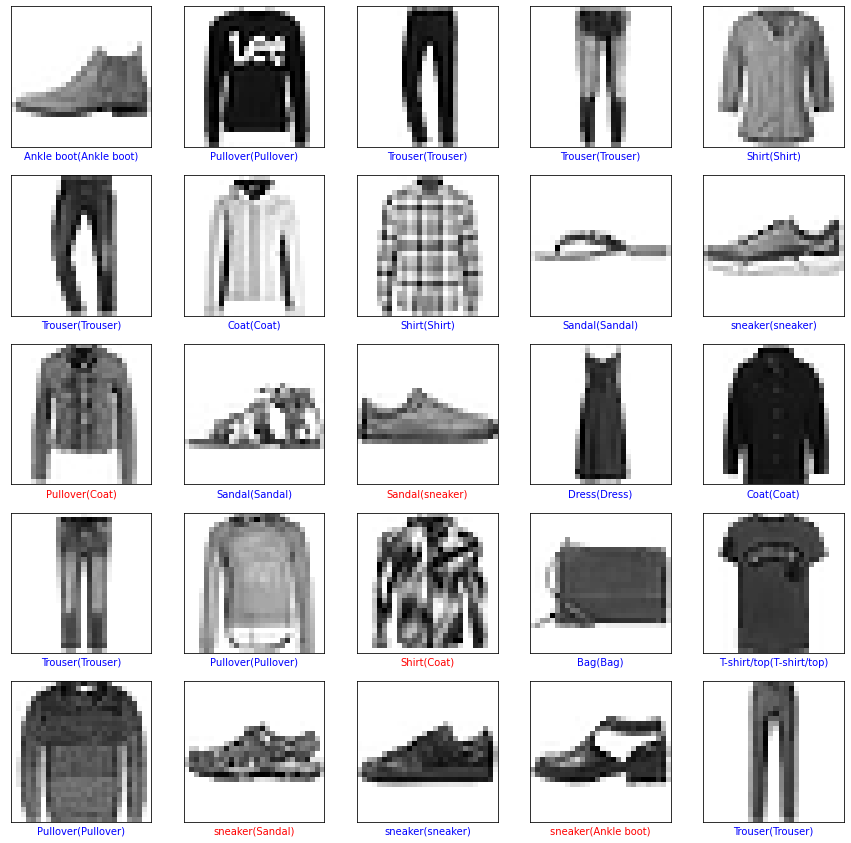

In [ ]:
plt.figure(figsize= (15,15))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap= plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  etiqueta = class_name[predicted_label] + '(' + class_name[true_label] + ')'
  
  plt.xlabel(etiqueta).set_color(color)
